In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.interpolate import UnivariateSpline
data=pd.read_pickle('AQI-FE1-Binarized.pkl')
dx=data[[ 'Month', 'Quarter', 'Dayofweek', 'HourofDay',
       'DayofMonth', 'Dayoftheyear', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday','NO2(GT)']].copy(deep=True)
dx.sort_index(inplace=True)

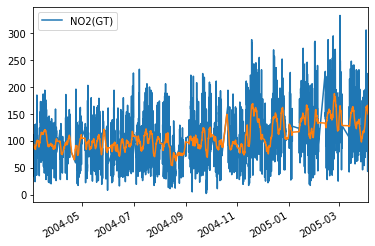

In [3]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx1=dx['NO2(GT)'].rolling(window=72, center=True, min_periods=24).mean()
dx.plot(y='NO2(GT)',ax=ax)
dx1.plot(y='NO2(GT)', ax=ax)

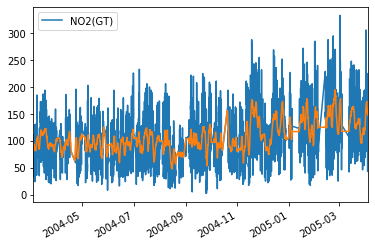

In [4]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx2=dx['NO2(GT)'].rolling(window=48, center=True, min_periods=24).mean()
dx.plot(y='NO2(GT)',ax=ax)
dx2.plot(y='NO2(GT)', ax=ax)

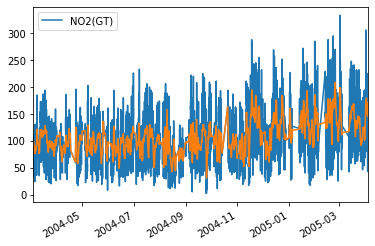

In [5]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx3=dx['NO2(GT)'].rolling(window=24, center=True, min_periods=24).mean()
dx.plot(y='NO2(GT)',ax=ax)
dx3.plot(y='NO2(GT)', ax=ax)

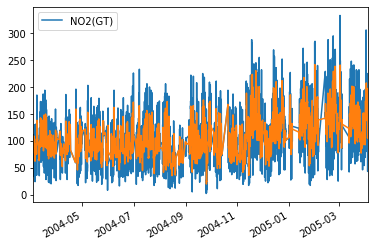

In [6]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx4=dx['NO2(GT)'].rolling(window=12, center=True, min_periods=12).mean()
dx.plot(y='NO2(GT)',ax=ax)
dx4.plot(y='NO2(GT)', ax=ax)

In [7]:
dx['rolling-72']=dx['NO2(GT)'].rolling(window=72, center=True, min_periods=6).mean()
dx['rolling-48']=dx['NO2(GT)'].rolling(window=48, center=True, min_periods=6).mean()
dx['rolling-24']=dx['NO2(GT)'].rolling(window=24, center=True, min_periods=6).mean()
dx['rolling-12']=dx['NO2(GT)'].rolling(window=12, center=True, min_periods=6).mean()

In [8]:
train=dx.loc[:'2005-3-1'].copy(deep=True)
test=dx.loc['2005-3-2':].copy(deep=True)

In [14]:
attb=['rolling-72','rolling-48','rolling-24','rolling-12']
RM = lm.LinearRegression()
RM.fit(train[attb],train['T'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
pred = RM.predict(test[attb])
pred=pd.DataFrame(pred,columns=['Prediction'])
pred.index=test.index
test1=pd.concat([test,pred],axis=1)

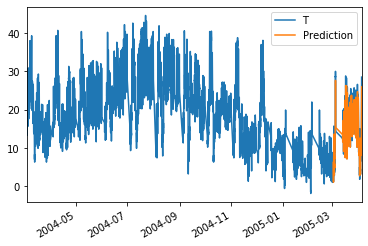

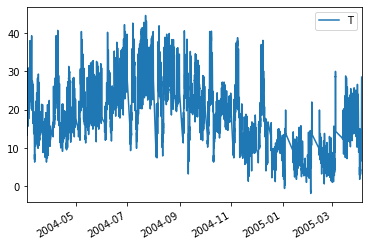

In [16]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx.plot(y='T',ax=ax)
test1.plot(y='Prediction',ax=ax)
dx.plot(y='T')

In [18]:
mean_squared_error(test1['T'], test1['Prediction'])

2.898216251731607

In [19]:
r2_score(test1['T'], test1['Prediction'])

0.9173776723167703

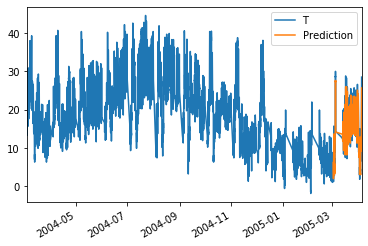

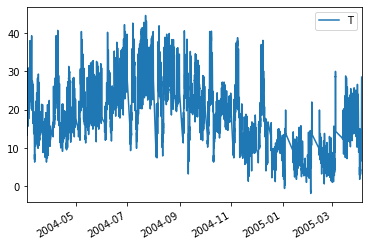

In [26]:
reg2 = RandomForestRegressor(random_state=1, n_estimators=100,max_depth=30,min_samples_leaf=3,min_samples_split=5)
reg2.fit(train[attb],train['T'])
pred = reg2.predict(test[attb])
pred=pd.DataFrame(pred,columns=['Prediction'])
pred.index=test.index
test1=pd.concat([test,pred],axis=1)
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx.plot(y='T',ax=ax)
test1.plot(y='Prediction',ax=ax)
dx.plot(y='T')

In [27]:
mean_squared_error(test1['T'], test1['Prediction'])


3.1319273850381295

In [28]:
r2_score(test1['T'], test1['Prediction'])

0.9107150370397327

,Month,Quarter,Dayofweek,HourofDay,DayofMonth,Dayoftheyear,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,T,rolling-72,rolling-48,rolling-24,rolling-12,Prediction-1
2005-03-02 00:00:00,3,1,2,0,2,61,0,0,1,0,0,0,0,4.5,6.369017,7.941026,5.989904,5.934135,6.176547
2005-03-02 01:00:00,3,1,2,1,2,61,0,0,1,0,0,0,0,3.9,6.367628,7.851763,6.109135,5.378686,5.117817
2005-03-02 02:00:00,3,1,2,2,2,61,0,0,1,0,0,0,0,3.4,6.385684,7.768309,6.256651,4.754808,3.429611
2005-03-02 03:00:00,3,1,2,3,2,61,0,0,1,0,0,0,0,3.3,6.419017,7.671915,6.457452,4.129167,3.138030
2005-03-02 04:00:00,3,1,2,4,2,61,0,0,1,0,0,0,0,2.0,6.455128,7.570913,6.715705,3.568429,2.505971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,4,2,0,10,4,94,1,0,0,0,0,0,0,21.9,10.712195,13.313793,15.758824,18.454545,20.364291
2005-04-04 11:00:00,4,2,0,11,4,94,1,0,0,0,0,0,0,24.3,10.822500,13.557143,16.312500,19.120000,20.560993
2005-04-04 12:00:00,4,2,0,12,4,94,1,0,0,0,0,0,0,26.9,10.946154,13.777778,16.960000,20.088889,21.422836
2005-04-04 13:00:00,4,2,0,13,4,94,1,0,0,0,0,0,0,28.3,11.121053,13.976923,17.157143,21.412500,24.585479
